# Analisis de datos con Python

### Instalación e importación de librerías 

In [59]:
# Manejo de datos/dataframes
!pip install pandas

# Jupyter 
!pip install ipywidgets

# Cálculo, Estadística, ML...
!pip install scipy
!pip install scikit-learn

# Visualizacion
!pip install matplotlib
!pip install seaborn

In [60]:
from scipy import stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [61]:
# Semilla para obtener mismos resultados en métodos/funciones que utilicen selecciones aleatorias: "random_seed" o similar.
SEED = 1234

## Carga de datos
- Para poder comenzar la preparación de datos necesitamos cargarlos.
- **Importance explorar los datos antes si es posible** (Desde Excel, bloc de notas, etc.).
- Saber detalles previos como su formato, como se separan los datos, etc. facilitaran su carga.
- Si el conjunto total de datos no es posible cargarlo en memoria, realizar la exploración inicial con una muestra representativa.
- Tipos comunes de datos:
  - .csv:  comma separated values: .read_csv()
  - .json: JavaScript Object Notation (dictionary like): .read_json()
  - .parquet: formato tabular de Apache:  .read_parquet()
etc.

In [62]:
df = pd.read_csv('googleplaystore.csv')

 ## Previsualización de los datos o Data previsualization
- Para tener una vista y comprensión rápida de los datos a tratar: tipo, tamaño, numero de campos, etc.
    - .shape
    - .head()
    - .tail()
    - .sample()
    - .dtypes


In [63]:
df.shape

(10841, 13)

In [64]:
len(df)

10841

In [65]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [66]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [67]:
df.sample(n=5, random_state=SEED)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2709,SavingStar - Grocery Coupons,SHOPPING,4.2,31519,21M,"1,000,000+",Free,0,Everyone,Shopping,"June 12, 2018",4.9.1,4.0 and up
10397,FH WiFiCam,PHOTOGRAPHY,2.6,201,2.5M,"10,000+",Free,0,Everyone,Photography,"May 2, 2017",2.1,4.1 and up
7381,IQ Test,PRODUCTIVITY,4.2,1623,1.8M,"100,000+",Free,0,Everyone,Productivity,"March 6, 2018",1.8,2.3 and up
3972,Air Transat CinePlus B,TRAVEL_AND_LOCAL,2.2,83,6.7M,"50,000+",Free,0,Everyone,Travel & Local,"July 5, 2018",1.0.17.3905,4.4 and up
4090,The Coupons App,SHOPPING,4.5,181983,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,"April 27, 2018",Varies with device,Varies with device


In [68]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [69]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.3 MB


In [70]:
df.memory_usage(deep=True).sum() / 1000

np.float64(8664.898)

In [71]:
df.memory_usage(deep=True).sum()  / (1024 * 1024)

np.float64(8.263490676879883)

- Datos numéricos y categóricos.
- Numero de campos: 13
- Numero de filas: 10841
- Existen campos numéricos con un formato incorrecto.

## Data Profiling & Data Cleaning
- Perfilado de datos o Data Profiling: búsqueda de errores, inconsistencias, etc. dentro del conjunto de datos.
- Limpieza de datos o Data Cleaning: corrección/limpieza del conjunto de datos.

### Valores o Campos incorrectos

- Valores incorrectos, ya sea por error humano o no, intencional o no.
- Campos con formato incorrecto.
- La única manera de detectarlos es a través de la observación y el conocimiento de los datos y su contexto.
- Es recomendable realizar análisis de distribución, de frecuencias, etc. para poder llegar a detectarlos.


In [72]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [74]:
for col in df.select_dtypes('object').columns:
    print(f"{col}: \n{df[col].unique()}")
    print(f"{'='*50}")

App: 
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category: 
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Reviews: 
['159' '967' '87510' ... '603' '1195' '398307']
Size: 
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with devic

In [75]:
def clean_size(size: str) -> float:
    """
    Clean Size column
    
    :param size: input size string
    
    :return: float
    """
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    
df['Rating'] = df['Rating'].astype(float)
df['Reviews'] = df['Reviews'].map(lambda x: float(x.replace('M', '')))
df['Size'] = df['Size'].map(clean_size)
df['Price'] = df['Price'].replace('Everyone', np.nan).map(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y' ,errors='coerce')

In [76]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [77]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

### Valores faltantes o *Missing data*

- Los valores faltantes o *missing data* son aquellos valores que se encuentran ausentes dentro de su respectiva fila/entrada de datos y columna/variable/feature en un dataset. 
- Nomenclatura típica de datos faltantes: None, NaN, NAN, <NaN>, <NAN>, NaT, '', ' ' 
  - .isna()
  
*NAN: Not a Number*

In [78]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [79]:
# isna() devuelve la comprobación de si un dato es faltante (NaN) o no con "True" o "False"
df.isna().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
# isnull is an alias for isna. Literally in the code source of pandas
df.isnull().head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Información de valores faltantes
- isna().sum()

In [81]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [82]:
df.isna().sum().sum()

np.int64(3185)

In [83]:
df.isna().mean().mul(100).round(2).astype(str).add('%').sort_values(ascending=False)

Size              15.64%
Rating             13.6%
Current Ver        0.07%
Android Ver        0.03%
Type               0.01%
Price              0.01%
Content Rating     0.01%
Last Updated       0.01%
App                 0.0%
Category            0.0%
Reviews             0.0%
Installs            0.0%
Genres              0.0%
dtype: object

#### Opcion 1: Eliminar filas que contienen datos faltantes
- dropna()

In [84]:
df[df['Rating'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7.0,"100,000+",Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5.7,"100,000+",Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119.0,3.7,"50,000+",Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7.4,"100,000+",Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2.9,"10,000+",Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up


In [85]:
# dropna(): elimina filas con datos faltantes
df.dropna(axis=0).isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Opcion 2: Imputar valores faltantes
- Imputacion: consiste en el reemplazo de datos faltantes por otros. 
- Se suelen utilizar diferentes estrategias: cero, media, mediana, iterativa etc.
  - .fillna()

In [86]:
# select_dtypes: seleccionar solo los campos deseados
df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).mean()).isna().sum()

Rating     0
Reviews    0
Size       0
Price      0
dtype: int64

In [87]:
df[df['Rating'].isna()][['Rating']].head(2)

,Rating
23,NaN
113,NaN


In [88]:
df[['Rating']].fillna(df[['Rating']].median())[df['Rating'].isna()].head(2)

,Rating
23,4.3
113,4.3


In [89]:
df[['Rating']].fillna(0)[df['Rating'].isna()][['Rating']].head(2)

,Rating
23,0.0
113,0.0


#### Solución final elegida: eliminar todos los datos faltantes

In [90]:
# inplace: aplicar la funcion de Pandas sin necesidad de sobreescribir la variable del DataFrame.
df.dropna(axis=0, inplace=True)

### Outliers


- Valores extremos.
- Difieren significativamente  del resto del conjunto de datos en cuanto a situarse a una distancia “anormal”.
- Su origen puede ser natural o artificial

#### Detección de Outliers
- Z-score
- IQR
- etc.

##### Z-score
- Método estadístico que describe la relación que tienen los valores con la media del conjunto, midiéndose con el número de desviaciones estándar a esa media.
- El Z-score es igual a cero cuando x = μ (idéntico a la media)
- El Z-score es ± 1, ± 2, or ± 3, dependiendo de si x es ± 1, ± 2, or ± 3, respectivamente (el valor se encuentra a ± 1, ± 2, or ± 3 desviaciones estándar de la media).
- Este método asume una distribución normal.




<img src="https://sugermint.com/wp-content/uploads/2023/01/How-Do-Confidence-Intervals-Affect-the-Z-Score.jpg" width="600">

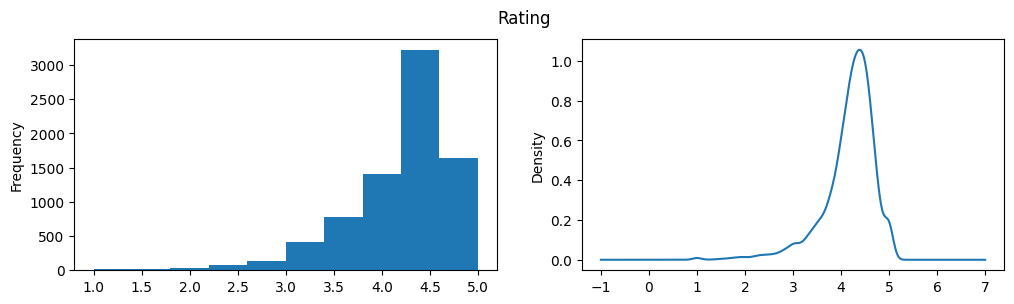

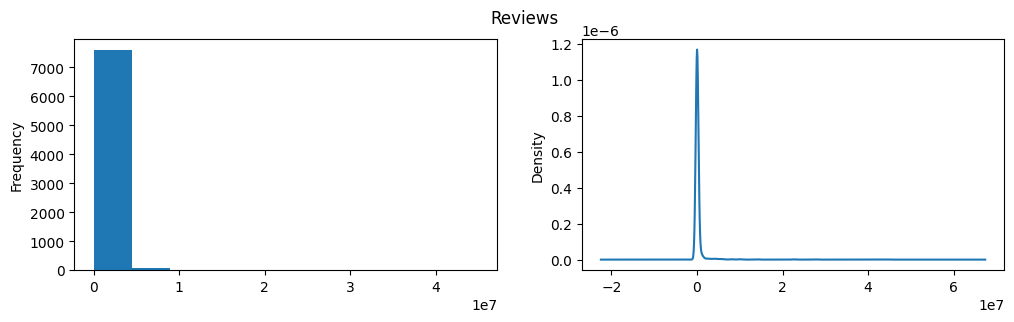

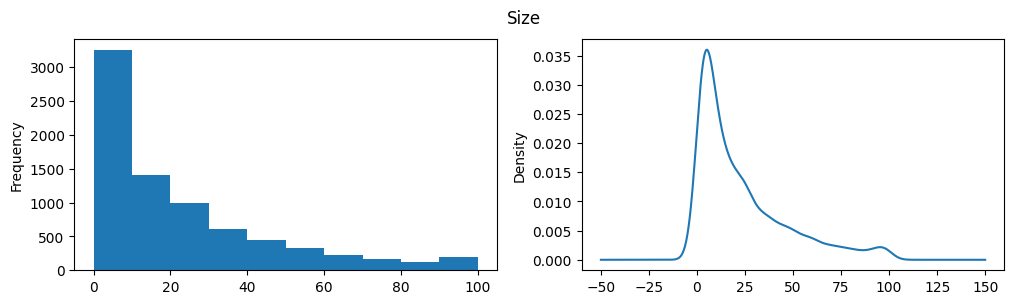

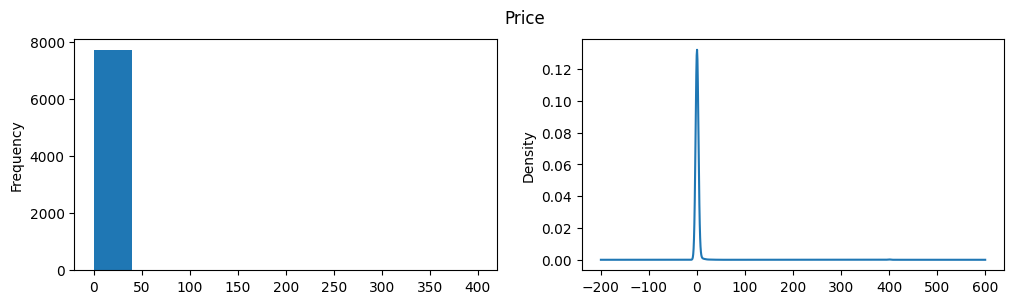

In [91]:
# Comprobar si la distribución de los datos se asemeja a una distribución normal
for num_col in df.select_dtypes(include=np.number).columns:
    fig, ax =plt.subplots(1,2)
    
    df[num_col].hist(figsize=(12, 3), grid=False, ax=ax[0])
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[1])
    
    ax[0].set_ylabel('Frequency')
    ax[1].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show()

#### Tratamiento de Outliers
- Eliminación:  se desechan las observaciones/entradas de datos/rows que contengan outliers.
- Imputación: los outliers se pueden imputar con valores.
- Transformación: la transformación de columnas/variables/features puede llegar a eliminar la presencia de outliers (cambiar la escala/ rango de los datos)



In [92]:
# Eliminacion
threshold = 3

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z < threshold).all(axis=1)]
print('original rows: ', df.shape[0])
print('outliers cleaned rows: ', df_clean.shape[0])

original rows:  7723
outliers cleaned rows:  7343


In [93]:
# Imputación
threshold = 3

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = df.select_dtypes(include=np.number)[(z > threshold).all(axis=1)]
df.select_dtypes(include=np.number)[outliers] = np.nan
df_clean = df.select_dtypes(include=np.number).fillna(df.select_dtypes(include=np.number).mean())
print('original rows: ', df.shape[0])
print('outliers cleaned rows: ', df_clean.shape[0])

original rows:  7723
outliers cleaned rows:  7723


In [94]:
np.log(df[num_col].replace([np.inf, -np.inf], np.nan)).value_counts()

/home/sergio_sampayo/personal/VASS_University/FP/workshop-analisis-de-datos-python/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Price
-inf         7146
-0.010050     105
 1.095273     101
 1.607436      63
 0.688135      53
             ... 
 1.526056       1
 1.064711       1
 0.678034       1
 0.940007       1
 0.182322       1
Name: count, Length: 68, dtype: int64

Column: Rating


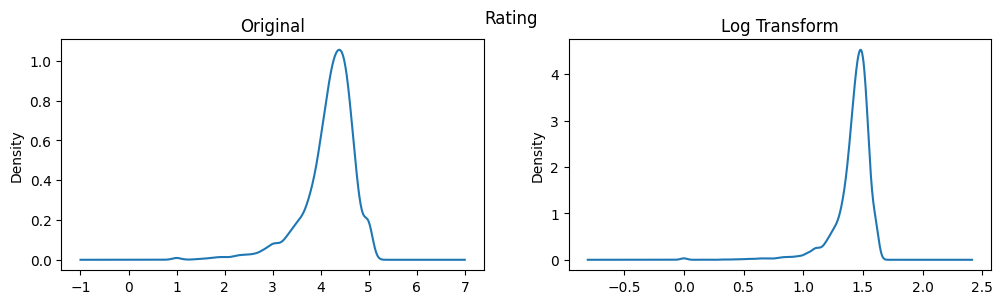

Column: Reviews


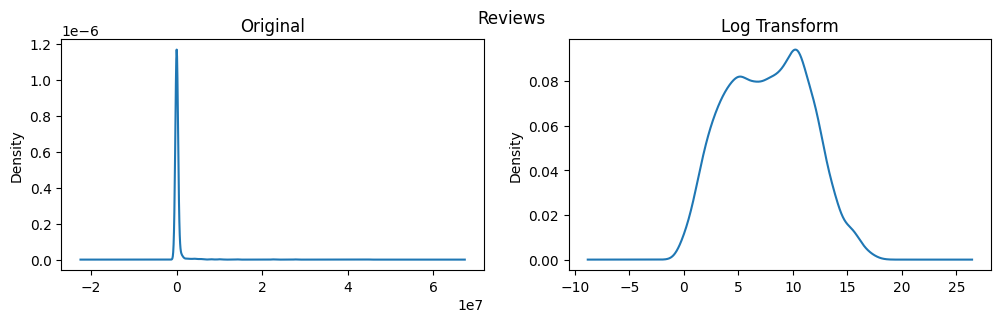

Column: Size


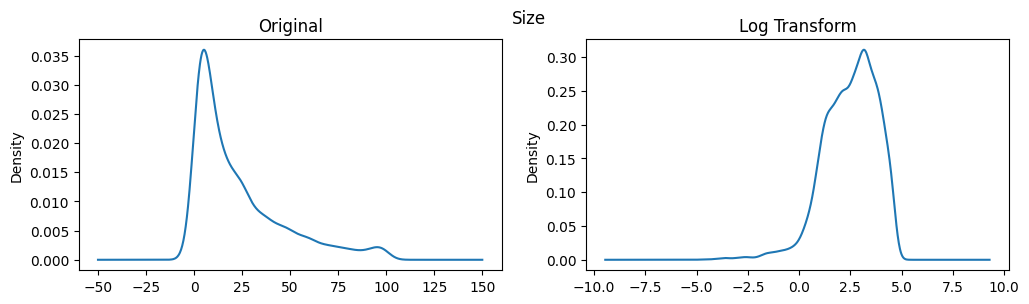

Column: Price
Log Transform not possible (infinite values)


/home/sergio_sampayo/personal/VASS_University/FP/workshop-analisis-de-datos-python/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sergio_sampayo/personal/VASS_University/FP/workshop-analisis-de-datos-python/.venv/lib/python3.11/site-packages/numpy/_core/function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/sergio_sampayo/personal/VASS_University/FP/workshop-analisis-de-datos-python/.venv/lib/python3.11/site-packages/numpy/_core/function_base.py:179: RuntimeWarning: invalid value encountered in add
  y += start
/home/sergio_sampayo/personal/VASS_University/FP/workshop-analisis-de-datos-python/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


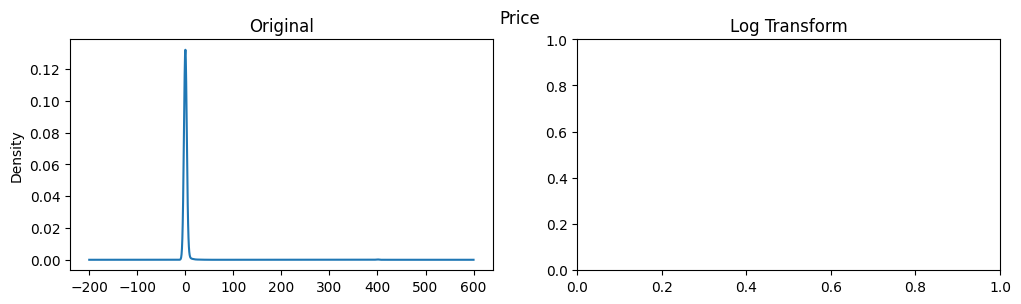

In [95]:
# Transformación: Log Transform
for num_col in df.select_dtypes(include=np.number).columns:
    print(f"Column: {num_col}")
    fig, ax =plt.subplots(1,2)
    
    df[num_col].plot.density(figsize=(12, 3), grid=False, ax=ax[0])
    try:
        np.log(df[num_col]).plot.density(figsize=(12, 3), grid=False, ax=ax[1])
    except ValueError:
        print('Log Transform not possible (infinite values)')
        pass
    
    ax[0].title.set_text('Original')
    ax[1].title.set_text('Log Transform')
    ax[0].set_ylabel('Density')
    fig.suptitle(num_col)
    plt.show()


### Valores duplicados

- Valores o entradas de datos repetidas dentro del dataset.
- Suelen desecharse: no suelen aportan valor en el entrenamiento de un modelo.
- Su eliminación puede realizarse por observación/fila o columna/feature.
  - .duplicated()
  - .drop_duplicates()

In [96]:
df.duplicated().sum()

np.int64(305)

In [97]:
df.drop_duplicates(keep='first', inplace=True)

In [98]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.
    
        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.
    
    inplace : bool, default ``False``
        Whether to modify the DataFrame rather than creating a 

## Analisis exploratorio de los datos

### Sumarización estadística de los datos
- Conocer más en detalle los datos: métricas estadísticas, frecuencia, distribución, etc.
  - .describe()

In [99]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Rating,7418.0,4.171394,5.498121e-01,1.0000,4.0,4.3,4.50,5.0
Reviews,7418.0,278996.116204,1.744309e+06,1.0000,99.0,2067.5,36900.75,44893888.0
Size,7418.0,22.760829,2.343921e+01,0.0085,5.1,14.0,33.00,100.0
Price,7418.0,1.117168,1.771571e+01,0.0000,0.0,0.0,0.00,400.0


- length and body mass have different data ranges

In [100]:
df.describe(include='O').T 

,count,unique,top,freq
App,7418,7023,ROBLOX,9
Category,7418,33,FAMILY,1590
Installs,7418,19,"1,000,000+",1229
Type,7418,2,Free,6873
Content Rating,7418,6,Everyone,5952
Genres,7418,112,Tools,633
Current Ver,7418,2519,1.0,451
Android Ver,7418,31,4.1 and up,1864


In [101]:
df["Last Updated"].dt.year.value_counts().sort_index()

Last Updated
2010       1
2011      15
2012      20
2013      86
2014     178
2015     370
2016     588
2017    1349
2018    4811
Name: count, dtype: int64

- App mas frecuente: "Roblox"
  - ¿Porque está repetida?
- Category mas frecuente: "FAMILY"
- Typo de App mas frecuenta: "Free"
- Rating promedio: 4.2
- Precios promedio: 1.12$
  - Precios maximos: 400$?
- Rango de fechas: 2010-2018

### Visualizacion

#### Analisis univariable
- Conocer la distribución de los datos, relaciones lineales o no lineales, etc.
  - .plot(): kind='bar'/'line'/'scatter'/...
  - .hist(), etc.
  - Matplotlib
  - Seaborn

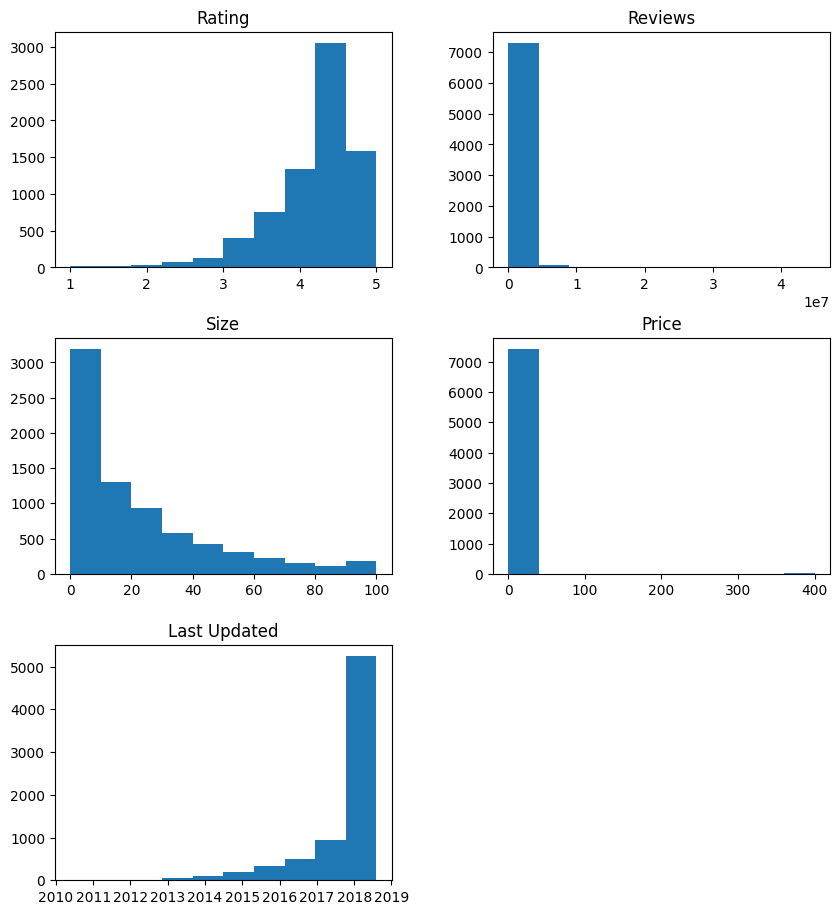

In [102]:
df.hist(layout=(4, 2), figsize=(10, 15),  grid=False);

- Distribuciones sesgadas a la derecha: Rating, Last Updated: Valores altos son mas frecuentes.
  - Rating: la mayoría de las aplicaciones tienen una calificación entre 4-5
  - Last Updated: la mayoría de las aplicaciones se actualizaron recientemente.
- Distribuciones sesgadas a la izquierda: Reviews, Size: Valores bajos son mas frecuentes.
  

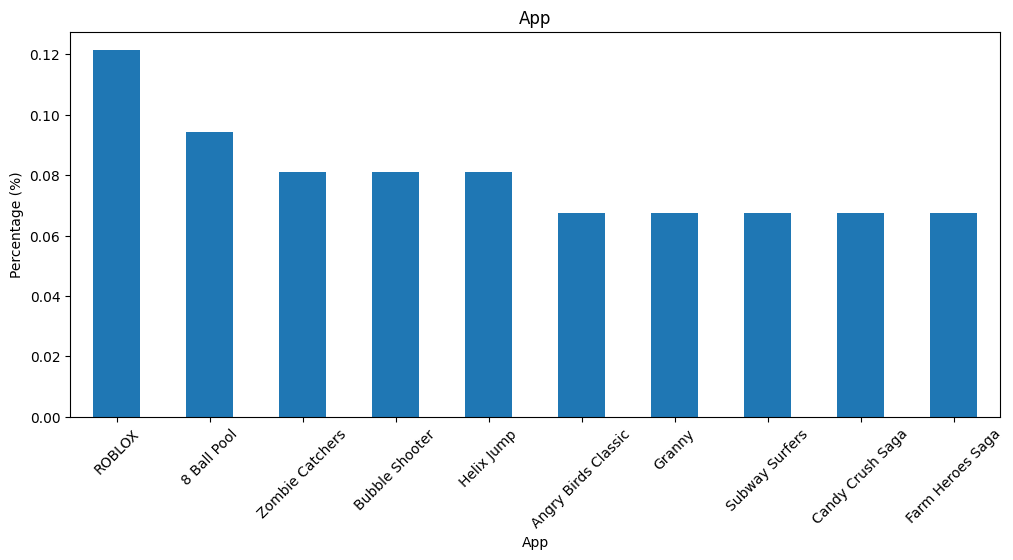

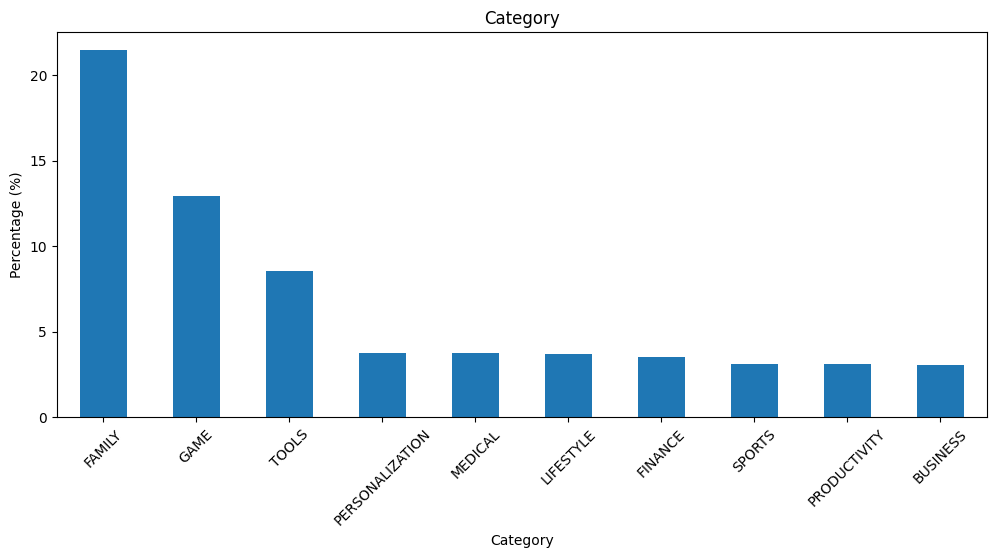

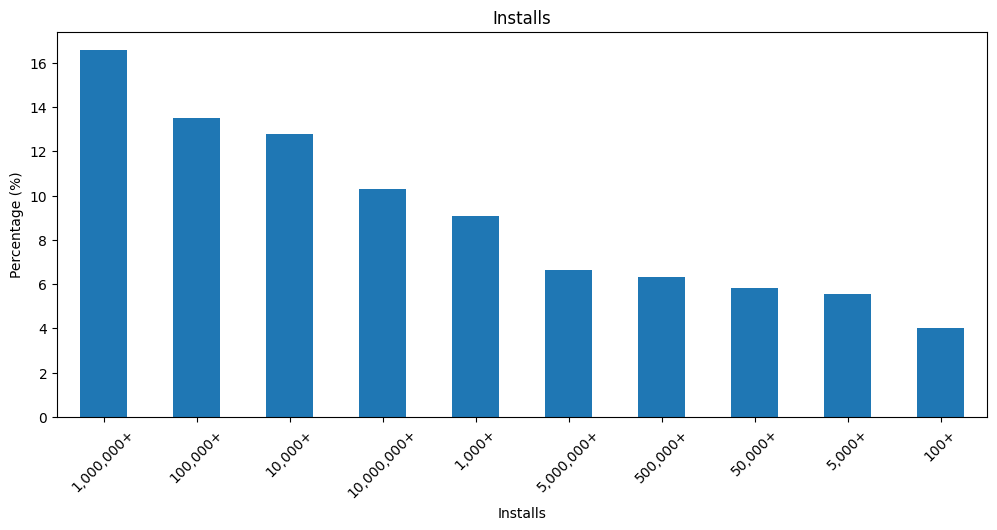

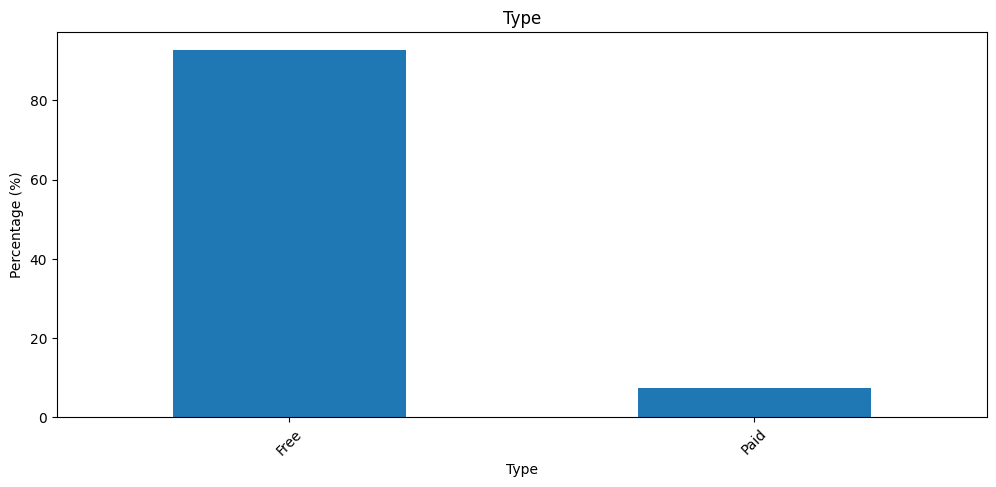

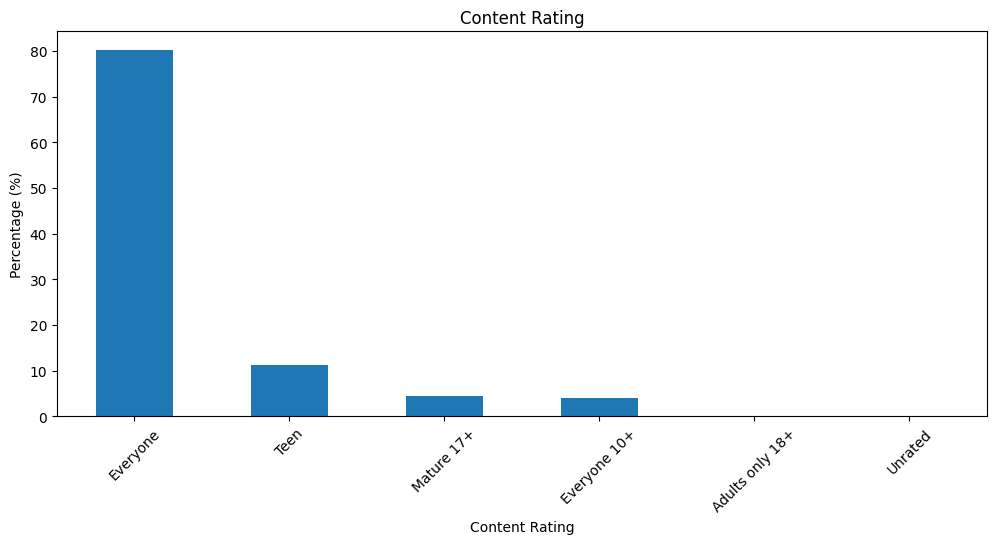

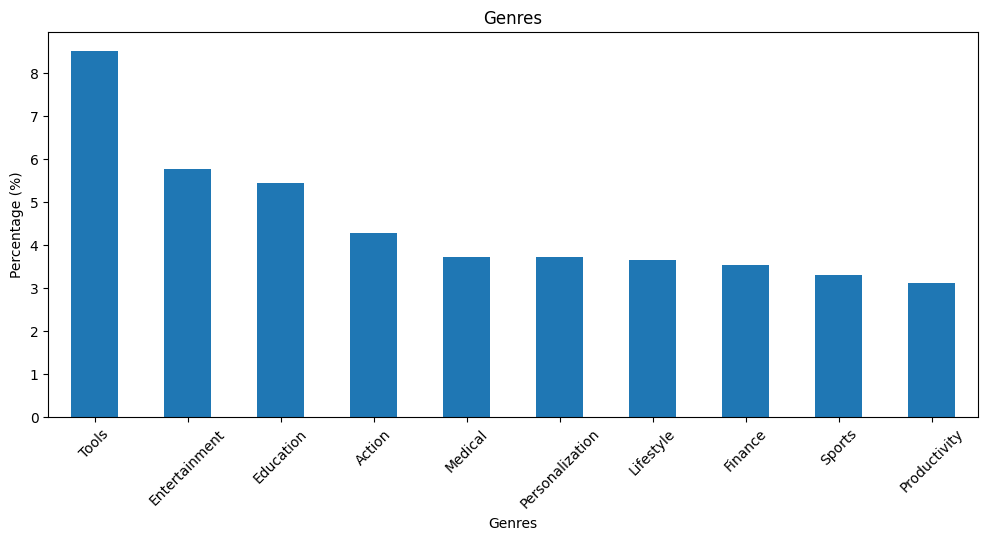

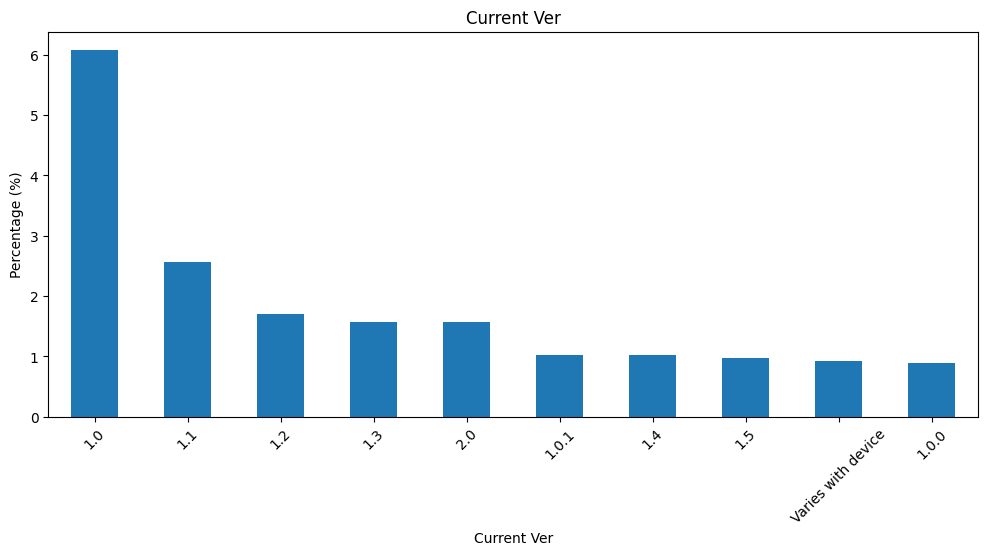

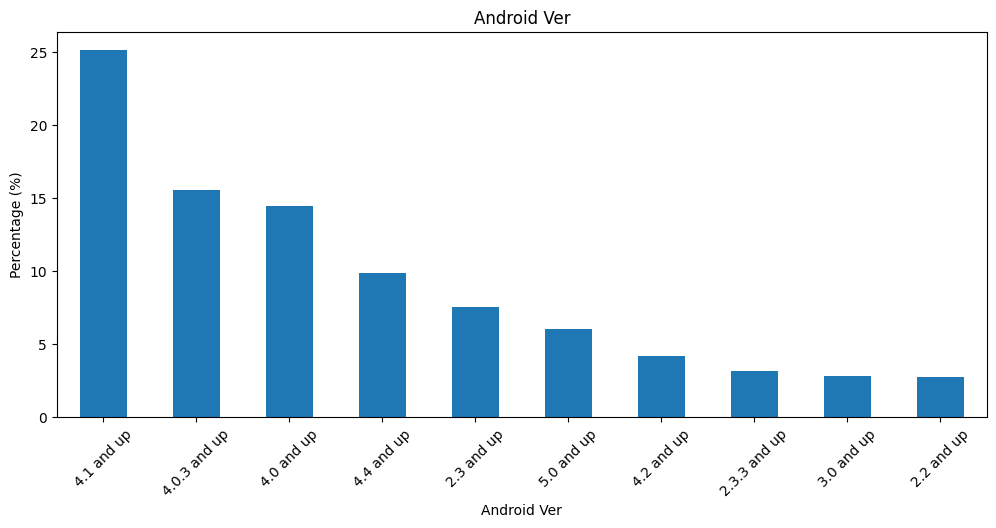

In [103]:
for cat_col in df.select_dtypes(include='object').columns.tolist():
    df[cat_col].value_counts(normalize=True)[:10].mul(100).plot(kind='bar', rot=45, figsize=(12, 5))
    plt.title(cat_col)
    plt.ylabel('Percentage (%)')
    plt.show()

- Apps mas descargadas son videojuegos.
- < 10% de las Apps son de pago.
- LA mayoria de apps no tienen restriccion de edad.
- Los tipos de apps destacados son herramientas (tools), entretenimiento y educación.
- Algo mas de la mitad de las apps no disponen de versiones posteriores a la 1.0 (60%).
- Algo mas de la mitad de las apps estan actualizadas a la version Android 4.

#### Analisis bivariable
- Relaciones entre dos variables.

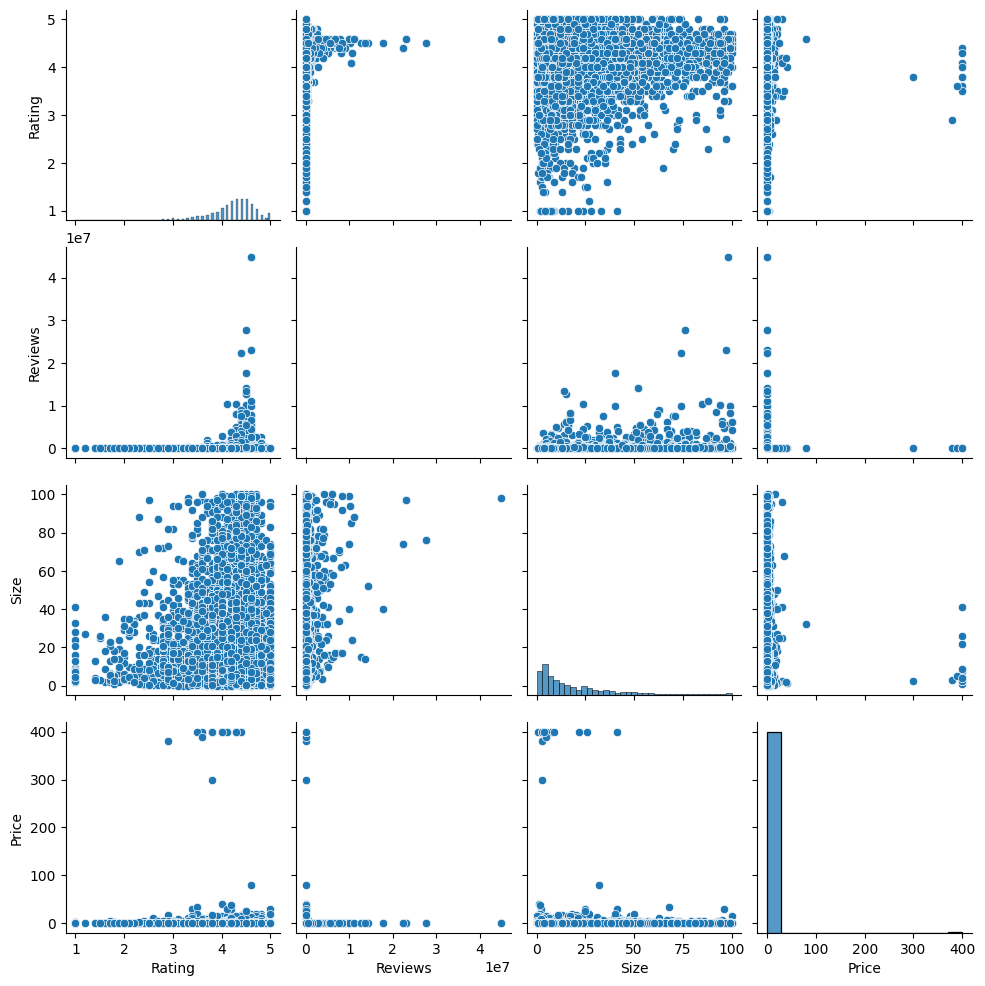

In [104]:
import seaborn as sns

%matplotlib inline

sns.pairplot(df.select_dtypes(include=np.number))

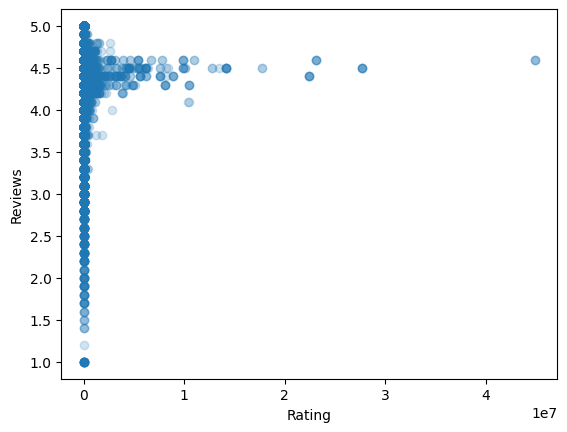

In [105]:
plt.scatter(df['Reviews'], df['Rating'], alpha=0.2)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

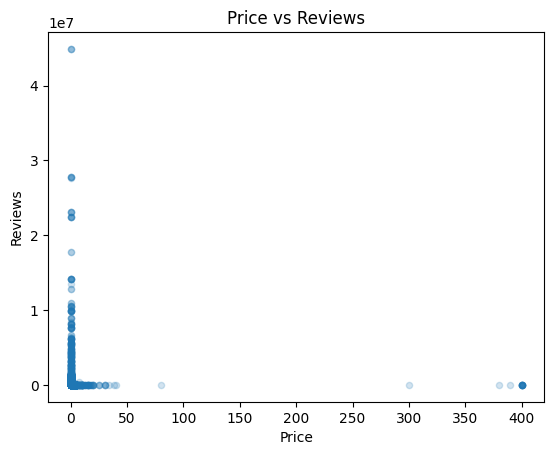

In [106]:
df.plot(kind='scatter', x='Price', y='Reviews', alpha=0.2)
plt.title('Price vs Reviews')
plt.show()

- Rating vs Reviews: Los Rating bajos tienen más Reviews que los altos (el descontento se expresa más).
- Price vs Reviews: Las aplicaciones gratuitas tienen más Reviews.

# Procesamiento de datos para machine learning

## Transformacion de los datos (Data Transformation)
- Para mejorar su entendimiento.
- Para mejorar su rendimiento en el entrenamiento de un modelo de ML.
- Para adecuar su uso al proporcionarlos a un modelo de ML.

### Escalado de datos (Scaling)

- Transformación de valores a un rango o escala concreta.
- Se utiliza  cuando los diferentes campos/columnas/features pueden poseer diferentes escalas 
- Ayuda a comparar diferentes campos al convertirlos a un mismo o similar rango de valores -> Ayuda en el entrenamiento del algoritmo de ML


In [107]:
df_num = df.select_dtypes(include=np.number)

#### Normalizacion
- Transforma los datos a una escala entre el menor y el mayor valor dados.
- Queremos cambiar el rango de los datos y que posean una distribución normal.

In [108]:
df_num_norm = (df_num-df_num.mean())/(df_num.max()-df_num.min())

In [109]:
df_num_norm.head()

,Rating,Reviews,Size,Price
0,-0.017848,-0.006211,-0.037611,-0.002793
1,-0.067848,-0.006193,-0.087616,-0.002793
2,0.132152,-0.004265,-0.140620,-0.002793
3,0.082152,-0.001411,0.022394,-0.002793
4,0.032152,-0.006193,-0.199625,-0.002793


In [110]:
df_num.head()

,Rating,Reviews,Size,Price
0,4.1,159.0,19.0,0.0
1,3.9,967.0,14.0,0.0
2,4.7,87510.0,8.7,0.0
3,4.5,215644.0,25.0,0.0
4,4.3,967.0,2.8,0.0


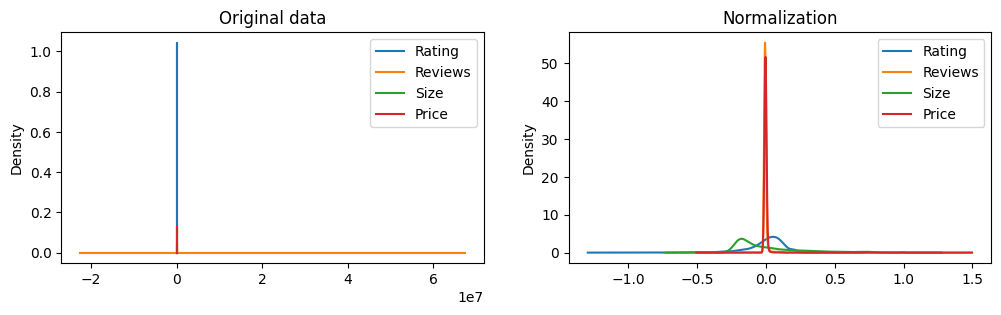

In [111]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_norm.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Normalization')

plt.show()

In [112]:
df.select_dtypes(include='O').join(df_num_norm, how='left').head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Rating,Reviews,Size,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up,-0.017848,-0.006211,-0.037611,-0.002793
1,Coloring book moana,ART_AND_DESIGN,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,-0.067848,-0.006193,-0.087616,-0.002793
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",Free,Everyone,Art & Design,1.2.4,4.0.3 and up,0.132152,-0.004265,-0.140620,-0.002793
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",Free,Teen,Art & Design,Varies with device,4.2 and up,0.082152,-0.001411,0.022394,-0.002793
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",Free,Everyone,Art & Design;Creativity,1.1,4.4 and up,0.032152,-0.006193,-0.199625,-0.002793


#### Escalado Mínimo-Máximo (Min-Max Scaling)
- Substrae a cada valor el valor mínimo del conjunto de datos y lo divide por el rango de dicho conjunto.
- Queremos cambiar el rango de los datos sin cambiar la forma de su distribución.
  - MinMaxScaler()


In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_num_minmax = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [114]:
df_num_minmax.head()

,Rating,Reviews,Size,Price
0,0.775,0.000004,0.189931,0.0
1,0.725,0.000022,0.139927,0.0
2,0.925,0.001949,0.086922,0.0
3,0.875,0.004803,0.249936,0.0
4,0.825,0.000022,0.027917,0.0


In [115]:
df_num.head()

,Rating,Reviews,Size,Price
0,4.1,159.0,19.0,0.0
1,3.9,967.0,14.0,0.0
2,4.7,87510.0,8.7,0.0
3,4.5,215644.0,25.0,0.0
4,4.3,967.0,2.8,0.0


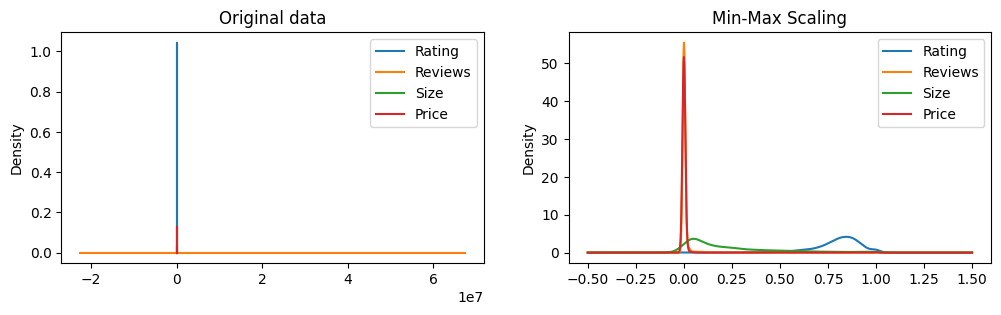

In [116]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_minmax.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Min-Max Scaling')

plt.show()

In [117]:
df.select_dtypes(include='O').join(df_num_norm, how='left').head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Rating,Reviews,Size,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up,-0.017848,-0.006211,-0.037611,-0.002793
1,Coloring book moana,ART_AND_DESIGN,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,-0.067848,-0.006193,-0.087616,-0.002793
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",Free,Everyone,Art & Design,1.2.4,4.0.3 and up,0.132152,-0.004265,-0.140620,-0.002793
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",Free,Teen,Art & Design,Varies with device,4.2 and up,0.082152,-0.001411,0.022394,-0.002793
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",Free,Everyone,Art & Design;Creativity,1.1,4.4 and up,0.032152,-0.006193,-0.199625,-0.002793


#### Estandarización (Standardization)
- Transforma los datos extrayendo la media y dividiendo por la desviación estándar.
- Queremos asegurarnos de que la media es cero y la desviación estándar es uno, ayudando al modelo en el entrenamiento.
  - StandardScaler()

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_std = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

In [119]:
df_num_std.head()

,Rating,Reviews,Size,Price
0,-0.129860,-0.159866,-0.160461,-0.063065
1,-0.493645,-0.159403,-0.373793,-0.063065
2,0.961495,-0.109785,-0.599925,-0.063065
3,0.597710,-0.036322,0.095537,-0.063065
4,0.233925,-0.159403,-0.851657,-0.063065


In [120]:
df_num.head()

,Rating,Reviews,Size,Price
0,4.1,159.0,19.0,0.0
1,3.9,967.0,14.0,0.0
2,4.7,87510.0,8.7,0.0
3,4.5,215644.0,25.0,0.0
4,4.3,967.0,2.8,0.0


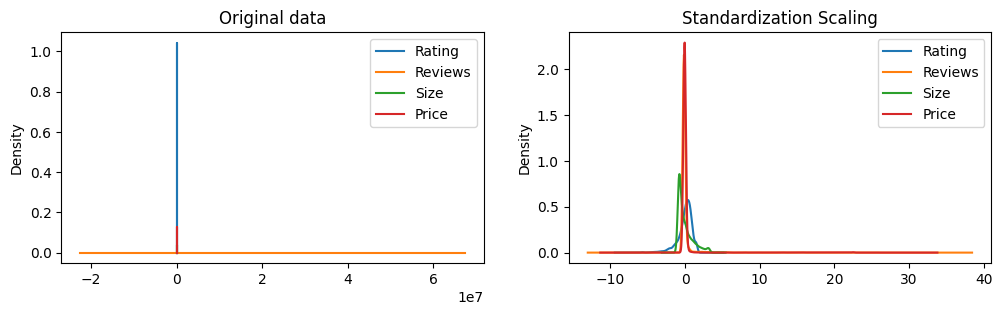

In [121]:
fig, ax =plt.subplots(1,2)

df_num.plot.density(figsize=(12, 3), grid=False, ax=ax[0])
df_num_std.plot.density(figsize=(12, 3), grid=False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Standardization Scaling')

plt.show()

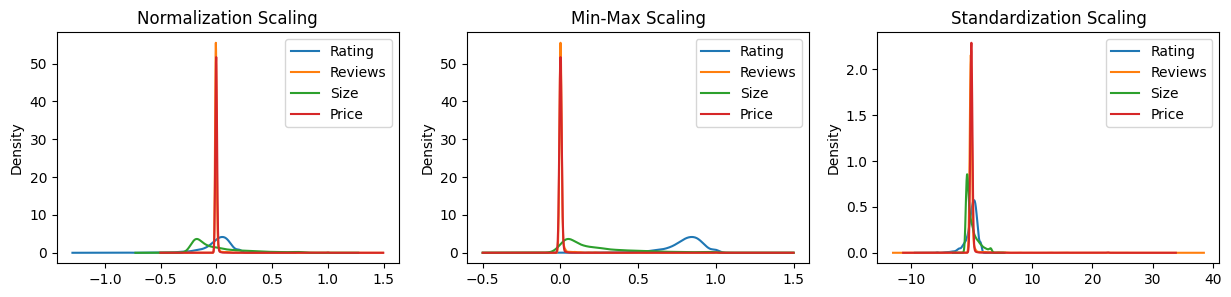

In [122]:
fig, ax =plt.subplots(1,3)

df_num_norm.plot.density(figsize=(15, 3), grid=False, ax=ax[0])
df_num_minmax.plot.density(figsize=(15, 3), grid=False, ax=ax[1])
df_num_std.plot.density(figsize=(15, 3), grid=False, ax=ax[2])

ax[0].title.set_text('Normalization Scaling')
ax[1].title.set_text('Min-Max Scaling')
ax[2].title.set_text('Standardization Scaling')

plt.show()

In [123]:
df.select_dtypes(include='O').join(df_num_minmax, how='left').head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Rating,Reviews,Size,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up,0.775,0.000004,0.189931,0.0
1,Coloring book moana,ART_AND_DESIGN,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,0.725,0.000022,0.139927,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",Free,Everyone,Art & Design,1.2.4,4.0.3 and up,0.925,0.001949,0.086922,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",Free,Teen,Art & Design,Varies with device,4.2 and up,0.875,0.004803,0.249936,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",Free,Everyone,Art & Design;Creativity,1.1,4.4 and up,0.825,0.000022,0.027917,0.0


### Codificación (Encoding)
- Transformación de valores categóricos en valores numéricos.
- Suele ser necesaria ya que los diferentes algoritmos de machine learning, por norma general, solo aceptan la ingesta de datos numéricos.
  - Label/Ordinal Encoding
  - One-Hot Encoding
  - Binary Encoding
  - etc.

In [124]:
df_cat = df.select_dtypes(include='O')

In [125]:
df_cat.head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


#### Label/Ordinal Encoding
- Codificación de categorías con valores enteros siguiendo un orden: 0, 1, 2, etc.
  - LabelEncoder()

In [126]:
df.select_dtypes(include='object').head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,"10,000+",Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,"500,000+",Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,"5,000,000+",Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,"50,000,000+",Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,"100,000+",Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [127]:
# specify the order of the categories
ordinal_type_map = {'Free': 0, 'Paid': 1}

# perform ordinal encoding on the 'quality' column
df_cat['Type'].map(ordinal_type_map).value_counts()

Type
0    6873
1     545
Name: count, dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
df_cat_le = df_cat.apply(LabelEncoder().fit_transform)
df_cat_le.head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver
0,5048,0,5,0,1,9,107,14
1,1893,0,17,0,1,11,926,14
2,6325,0,12,0,1,9,413,14
3,5697,0,15,0,4,9,2464,17
4,5089,0,8,0,1,10,246,19


In [129]:
for col in df_cat.columns:
    print(col, ':', list(set(df[col])),'-->' , list(set((df_cat_le[col]))))

App : ['Dolphins Live Wallpaper', 'Alpha Bank CY', 'Fast Motorcycle Driver 2016', "Rock N' Cash Casino Slots -Free Vegas Slot Games", 'NB|AZ Business Mobile Banking', 'HumorCast - Authentic Weather', 'Unseen - No Last Seen', 'DS Speedometer & Odometer', 'FK Crvena zvezda', 'Height Converter feet-inch cm', 'English-Myanmar Dictionary', 'Yahoo Mail – Stay Organized', 'Fernanfloo', 'Freeletics: Personal Trainer & Fitness Workouts', 'auto Call Recorder 2018', 'CheckPoints 🏆 Rewards App', 'DK Browser', 'imo free video calls and chat', 'Slendrina X', 'Easy Origami Ideas', 'AP Stamps and Registration', 'letgo: Buy & Sell Used Stuff, Cars & Real Estate', 'Ultimate Calculator for CR', 'Candy Crush Saga', 'Elif Ba Oyunu', 'eG Monitor', 'Dr Bk Sachin bhai', 'XX HD Video downloader-Free Video Downloader', 'CG JOKES - Copy & Share', 'U-48 Submarine Commander Free', 'Merge Dragons!', 'Bw Events', 'Sic Bo Rave', 'DRAGON QUEST VI', 'Chinese Chess ( Xiangqi Free )', 'Water Surfer Racing In Moto', 'EF A

#### Solucion aplicada: label encoding

In [130]:
le = LabelEncoder()

df = df_cat.apply(LabelEncoder().fit_transform).join(df.select_dtypes(include=np.number), how='left')

In [131]:
df.head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Rating,Reviews,Size,Price
0,5048,0,5,0,1,9,107,14,4.1,159.0,19.0,0.0
1,1893,0,17,0,1,11,926,14,3.9,967.0,14.0,0.0
2,6325,0,12,0,1,9,413,14,4.7,87510.0,8.7,0.0
3,5697,0,15,0,4,9,2464,17,4.5,215644.0,25.0,0.0
4,5089,0,8,0,1,10,246,19,4.3,967.0,2.8,0.0


### Discretización (Discretization)
- La discretización o discretization consiste en la conversión o transformación de variables/features continuas (temperatura, tiempo, peso, etc.) en discretas. 
- Facilita el entendimiento de la variable y la detección de outliers.
- El objetivo es mejorar el rendimiento del algoritmo de ML en el aprendizaje.
  - Uniform
  - Quantile
  - etc.

#### Uniforme (Uniform discretization or Equal-width)
- Consiste en dividir el rango de la variable continua entre n intervalos de igual tamaño o bins.
- La ventaja y desventaja al mismo tiempo de este tipo de discretización es que no afecta significativamente a la distribución de la variable.
    - pandas.cut()

In [132]:
df['Reviews_categories'] =  pd.cut(df['Reviews'].values, bins=3, labels=[0, 1, 2])

In [133]:
df['Reviews_categories'].value_counts()

Reviews_categories
0    7399
1      16
2       3
Name: count, dtype: int64

In [134]:
df[['Reviews', 'Reviews_categories']]

,Reviews,Reviews_categories
0,159.0,0
1,967.0,0
2,87510.0,0
3,215644.0,0
4,967.0,0
...,...,...
10833,44.0,0
10834,7.0,0
10836,38.0,0
10837,4.0,0


#### Discretización avanzada con uso de algoritmos de ML
- Existen otros tipos de discretización más avanzados que requieren el uso de algoritmos de ML:
  - Clustering con K-means
  - Árboles de decisión
  - etc.


### Reducción dimensional (Dimensionality reduction)
- La reducción de dimensiones o dimensionality reduction consiste en limitar el número de variables o features en un dataset para preservar únicamente la información relevante.
- Esta reducción puede ser lineal o no lineal, dependiendo del método usado.
  - Seleccion de variables
  - Extracción de variables
  - etc.

#### Selección de variables (Feature selection)

##### Métodos de filtrado (Filter Methods)
- Selecciona un subset de features basado en su relación estadística con el target/etiqueta/label
  - Chi-cuadrado: :prueba estadística para evaluar la probabilidad de correlación utilizando su distribución de frecuencia.
  - ANOVA: análisis de la varianza: prueba estadística de si las medias de varios grupos son iguales o no.
  - Pearson: mide la relación estadística entre dos variables continuas lineales.
  - Métodos de envoltura (Wrapper Methods)
  - Métodos embebidos (Embedded Methods)
  - etc.

##### Pearson
- .corr()

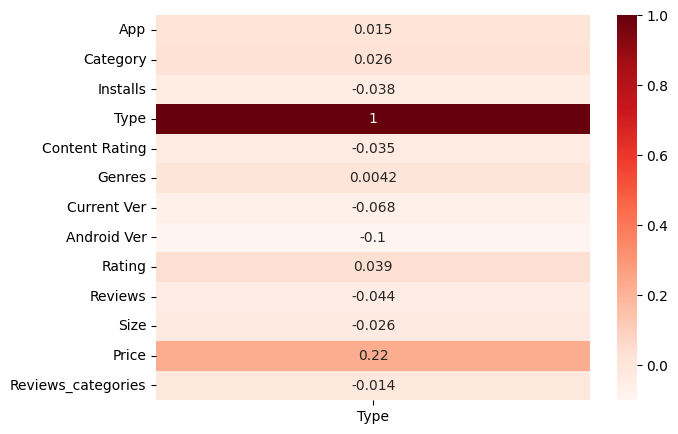

In [135]:
#### Correlación de Pearson/Spearman

target_correlation = df.corr(method='pearson')[['Type']]  # method = 'spearman'

plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [136]:
target_correlation.dropna().sort_values('Type', ascending=False)

,Type
Type,1.000000
Price,0.223957
Rating,0.038993
Category,0.025536
App,0.015376
Genres,0.004229
Reviews_categories,-0.013609
Size,-0.026262
Content Rating,-0.034530
Installs,-0.037973


#### Extracción de variables (Feature extraction)
- Análisis principal de componentes o Principal Component Analysis (PCA)
- Análisis discriminante lineal o Linear Discriminant Analysis (LDA)
- etc.

Análisis principal de componentes o Principal Component Analysis (PCA)
  - Método que busca un espacio dimensional más bajo preservando la varianza del espacio dimensional original utilizando transformaciones lineales.

In [137]:
df.head()

,App,Category,Installs,Type,Content Rating,Genres,Current Ver,Android Ver,Rating,Reviews,Size,Price,Reviews_categories
0,5048,0,5,0,1,9,107,14,4.1,159.0,19.0,0.0,0
1,1893,0,17,0,1,11,926,14,3.9,967.0,14.0,0.0,0
2,6325,0,12,0,1,9,413,14,4.7,87510.0,8.7,0.0,0
3,5697,0,15,0,4,9,2464,17,4.5,215644.0,25.0,0.0,0
4,5089,0,8,0,1,10,246,19,4.3,967.0,2.8,0.0,0


In [138]:
from sklearn.decomposition import PCA

# Division del dataset en campos/features y variable objetivo
X =df.drop('Price', axis=1)
y = df.Price

# Construcción del objeto PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df.drop('Price', axis=1)) 

# Representación 2D del PCA
total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%') # % de varianza preservado

# target_names = df.Price
# colors = ["navy", "turquoise", "darkorange"]
# lw = 2

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(
#         components[y == i, 0], components[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
#     )
    
# # plt.legend(species_name, loc="best", shadow=False, scatterpoints=1)
# plt.title("PCA")
# plt.show()

Total Explained Variance: 100.00%


In [139]:
components.shape

(7418, 2)

In [140]:
components[0:5]

array([[-278837.12710295,    1507.83980815],
       [-278029.12135715,   -1638.18982104],
       [-191486.11876095,    2787.80335673],
       [ -63352.08583654,    2181.52740731],
       [-278029.12471388,    1550.3130099 ]])

In [141]:
# import plotly.express as px

# pca = PCA(n_components=3)
# components = pca.fit_transform(df.drop('species', axis=1)) 

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2, color=df['species'],
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

### Ingeniería de variables

- Consiste en la creación de nuevas variables o features a partir de las features originales.
- Objetivo: obtener features más valiosas/significativas que ayuden a mejorar el desempeño del modelo de ML.
- Requiere de análisis e imaginación.
- Este termino también puede englobar el proceso completo de todas las secciones anteriores o sinónimo del data preparation.


In [142]:
df.columns

Index(['App', 'Category', 'Installs', 'Type', 'Content Rating', 'Genres',
       'Current Ver', 'Android Ver', 'Rating', 'Reviews', 'Size', 'Price',
       'Reviews_categories'],
      dtype='object')